In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# loading data csv

df_ev_cat = pd.read_csv('ev_cat_01-24.csv')   # Detailed India EV Market Data 2001 - 2024 Dataset
df_charging = pd.read_csv('OperationalPC.csv')  # Electric Vehicle Charging Stations in India Dataset
fuel_data = pd.read_csv("Fuel type Registration of Vehicles.csv")  # From Vehicle Registration India 17-22 Dataset

print("Files loaded")

Files loaded


In [3]:
# check ev data
print(df_ev_cat.info())
df_ev_cat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             284 non-null    object
 1   FOUR WHEELER (INVALID CARRIAGE)  284 non-null    int64 
 2   HEAVY GOODS VEHICLE              284 non-null    int64 
 3   HEAVY MOTOR VEHICLE              284 non-null    int64 
 4   HEAVY PASSENGER VEHICLE          284 non-null    int64 
 5   LIGHT GOODS VEHICLE              284 non-null    int64 
 6   LIGHT MOTOR VEHICLE              284 non-null    int64 
 7   LIGHT PASSENGER VEHICLE          284 non-null    int64 
 8   MEDIUM GOODS VEHICLE             284 non-null    int64 
 9   MEDIUM PASSENGER VEHICLE         284 non-null    int64 
 10  MEDIUM MOTOR VEHICLE             284 non-null    int64 
 11  OTHER THAN MENTIONED ABOVE       284 non-null    int64 
 12  THREE WHEELER(NT)                284

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0


In [4]:
# cleaning EV data
df_ev_cat_clean = df_ev_cat.copy()

if pd.isna(pd.to_datetime(df_ev_cat_clean.iloc[0]['Date'], errors='coerce')):
    df_ev_cat_clean = df_ev_cat_clean.drop(index=0).reset_index(drop=True)

df_ev_cat_clean['Date'] = pd.to_datetime(df_ev_cat_clean['Date'], errors='coerce', dayfirst=True)
df_ev_cat_clean = df_ev_cat_clean.dropna(subset=['Date'])

df_ev_cat_clean.head()

C:\Users\amitk\AppData\Local\Temp\ipykernel_2716\324745256.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ev_cat_clean['Date'] = pd.to_datetime(df_ev_cat_clean['Date'], errors='coerce', dayfirst=True)


,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,2001-01-01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
1,2002-01-01,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
2,2003-01-01,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
3,2004-01-01,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0
4,2005-01-01,0,0,0,0,10,14,1,0,0,0,0,0,0,1,38,0


In [5]:
# convert all vehicle count columns to numbers (ignore Date), fill blanks with 0
for col in df_ev_cat_clean.columns.drop('Date'):
    df_ev_cat_clean[col] = pd.to_numeric(df_ev_cat_clean[col], errors='coerce').fillna(0).astype(int)

In [6]:
# Extract Year and Month from 'Date' column
df_ev_cat_clean['Year'] = df_ev_cat_clean['Date'].dt.year
df_ev_cat_clean['Month'] = df_ev_cat_clean['Date'].dt.month

# Define vehicle categories based on actual column names
two_wheeler_cols = ['TWO WHEELER (INVALID CARRIAGE)', 'TWO WHEELER(NT)', 'TWO WHEELER(T)']
three_wheeler_cols = ['THREE WHEELER(NT)', 'THREE WHEELER(T)']
four_wheeler_cols = ['FOUR WHEELER (INVALID CARRIAGE)', 'LIGHT MOTOR VEHICLE', 'LIGHT PASSENGER VEHICLE']
bus_cols = ['HEAVY PASSENGER VEHICLE', 'MEDIUM PASSENGER VEHICLE']
goods_vehicle_cols = ['HEAVY GOODS VEHICLE', 'LIGHT GOODS VEHICLE', 'MEDIUM GOODS VEHICLE']

In [7]:
# List of categories and their respective column names
categories = {
    'EV_2W_Total': two_wheeler_cols,
    'EV_3W_Total': three_wheeler_cols,
    'EV_4W_Total': four_wheeler_cols,
    'EV_Bus_Total': bus_cols,
    'EV_Goods_Total': goods_vehicle_cols
}

# Create total columns for each category
for total_col, cols in categories.items():
    for col in cols:
        if col not in df_ev_cat_clean.columns:
            df_ev_cat_clean[col] = 0
    df_ev_cat_clean[total_col] = df_ev_cat_clean[cols].sum(axis=1)

In [25]:
df_ev_cat_clean['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024])

In [8]:
# Calculate overall EV total
ev_total_cols = ['EV_2W_Total', 'EV_3W_Total', 'EV_4W_Total', 'EV_Bus_Total', 'EV_Goods_Total']
df_ev_cat_clean['EV_Total'] = df_ev_cat_clean[ev_total_cols].sum(axis=1)

# Sample of the final cleaned data
df_ev_cat_clean[['Date', 'Year', 'Month', 'EV_Total'] + ev_total_cols].head()

,Date,Year,Month,EV_Total,EV_2W_Total,EV_3W_Total,EV_4W_Total,EV_Bus_Total,EV_Goods_Total
0,2001-01-01,2001,1,90,62,2,16,0,10
1,2002-01-01,2002,1,297,11,2,16,0,268
2,2003-01-01,2003,1,79,18,9,16,0,36
3,2004-01-01,2004,1,57,21,1,18,1,16
4,2005-01-01,2005,1,64,38,1,15,0,10


In [9]:
# Inspect charging station data
print(df_charging.info())
print(df_charging.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB
None
name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64


In [10]:
# first five rows
df_charging.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [11]:
df_charging_clean = df_charging.copy()  # Create a copy of the data

# Clean the 'state' column
df_charging_clean['state'] = df_charging_clean['state'].str.upper().str.strip()  # Uppercase and remove extra spaces
print("State names cleaned.")

# Calculate state-wise counts
df_charging_state_counts = df_charging_clean['state'].value_counts().reset_index()
df_charging_state_counts.columns = ['State', 'Count']
print("State-wise counts calculated.")

# Display top 10 states
print("\nTop 10 states:")
print(df_charging_state_counts.head(10))

State names cleaned.
State-wise counts calculated.

Top 10 states:
           State  Count
0    MAHARASHTRA    259
1     TAMIL NADU    175
2      KARNATAKA    134
3          DELHI    126
4         KERALA     91
5  UTTAR PRADESH     87
6        GUJARAT     77
7      TELANGANA     75
8      RAJASTHAN     68
9        HARYANA     60


In [12]:
# Now lets move to the feul type dataset

fuel_data.head()

,Month,CNG ONLY,DIESEL,DIESEL/HYBRID,DUAL DIESEL/CNG,ELECTRIC(BOV),ETHANOL,LPG ONLY,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,SOLAR,FUEL CELL HYDROGEN,LNG,METHANOL,DUAL DIESEL/LNG
0,Jan-14,2103,270915,3,0,232,0,188,10278,1347016,20623,0,0,6307,9,0,0,0,0
1,Feb-14,1607,219601,3,1,171,1,116,8884,1176669,15266,0,1,4803,17,0,0,0,0
2,Mar-14,2026,258723,3,1,220,1,106,11115,1329273,18800,0,0,5609,16,0,0,0,0
3,Apr-14,1718,222632,3,1,252,0,121,8522,1296500,19714,1,0,5600,19,0,0,0,0
4,May-14,1727,237336,6,0,186,2,103,9656,1408836,20626,0,1,6317,14,0,0,0,0


In [23]:
# print basic information, column names of the fuel registration dataframe

print("--- Fuel Registration Data ---")
print("Data Info:")
fuel_data.info()

print("\nColumns in the data:")
print(fuel_data.columns)

--- Fuel Registration Data ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month               115 non-null    object
 1   CNG ONLY            115 non-null    int64 
 2   DIESEL              115 non-null    int64 
 3   DIESEL/HYBRID       115 non-null    int64 
 4   DUAL DIESEL/CNG     115 non-null    int64 
 5   ELECTRIC(BOV)       115 non-null    int64 
 6   ETHANOL             115 non-null    int64 
 7   LPG ONLY            115 non-null    int64 
 8   NOT APPLICABLE      115 non-null    int64 
 9   PETROL              115 non-null    int64 
 10  PETROL/CNG          115 non-null    int64 
 11  PETROL/ETHANOL      115 non-null    int64 
 12  PETROL/HYBRID       115 non-null    int64 
 13  PETROL/LPG          115 non-null    int64 
 14  SOLAR               115 non-null    int64 
 15  FUEL CELL HYDROGEN  115 non-null

In [13]:
# Now extract the years from the 'Month' column, filters rows for an example year 2014, and sums up diesel and petrol registrations for that year

fuel_data['Year'] = pd.to_datetime(fuel_data['Month'], format='%b-%y', errors='coerce').dt.year
fuel_data_2014 = fuel_data[fuel_data['Year'] == 2014]

total_diesel_2014 = fuel_data_2014['DIESEL'].sum()
total_petrol_2014 = fuel_data_2014['PETROL'].sum()

print(f"Total Diesel registrations in 2014 : {total_diesel_2014}")
print(f"Total Petrol registrations in 2014 : {total_petrol_2014}")

print("\nData interpreted as 2014:")
fuel_data_2014

Total Diesel registrations in 2014 : 2848876
Total Petrol registrations in 2014 : 15988750

Data interpreted as 2014:


,Month,CNG ONLY,DIESEL,DIESEL/HYBRID,DUAL DIESEL/CNG,ELECTRIC(BOV),ETHANOL,LPG ONLY,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,SOLAR,FUEL CELL HYDROGEN,LNG,METHANOL,DUAL DIESEL/LNG,Year
0,Jan-14,2103,270915,3,0,232,0,188,10278,1347016,20623,0,0,6307,9,0,0,0,0,2014
1,Feb-14,1607,219601,3,1,171,1,116,8884,1176669,15266,0,1,4803,17,0,0,0,0,2014
2,Mar-14,2026,258723,3,1,220,1,106,11115,1329273,18800,0,0,5609,16,0,0,0,0,2014
3,Apr-14,1718,222632,3,1,252,0,121,8522,1296500,19714,1,0,5600,19,0,0,0,0,2014
4,May-14,1727,237336,6,0,186,2,103,9656,1408836,20626,0,1,6317,14,0,0,0,0,2014
5,Jun-14,1631,237271,2,0,148,0,105,10100,1346545,21392,0,2,7217,14,0,0,0,0,2014
6,Jul-14,1958,251127,2,0,199,1,192,10687,1332153,22858,0,0,8191,21,0,0,0,0,2014
7,Aug-14,2098,220031,2,0,180,0,149,13907,1200718,19690,0,0,7824,5,0,0,0,0,2014
8,Sep-14,2390,229065,1,0,167,0,167,8440,1272822,21557,1,0,8344,7,0,0,0,0,2014
9,Oct-14,2396,218954,2,0,188,1,156,7202,1457042,25373,0,1,7689,14,0,0,0,0,2014


In [21]:
df_fuel_reg_clean = fuel_data.copy() # Make a copy of original feul dataset

df_fuel_reg_clean['Year'] = pd.to_datetime(df_fuel_reg_clean['Month'], format='%b-%y', errors='coerce').dt.year
df_fuel_reg_clean.dropna(subset=['Year'], inplace=True)
df_fuel_reg_clean['Year'] = df_fuel_reg_clean['Year'].astype(int)

numeric_cols = df_fuel_reg_clean.select_dtypes(include=np.number).columns.drop('Year', errors='ignore')

for col in numeric_cols:
    df_fuel_reg_clean[col] = df_fuel_reg_clean[col].astype(str).replace(',', '', regex=True)
    df_fuel_reg_clean[col] = pd.to_numeric(df_fuel_reg_clean[col], errors='coerce').fillna(0).astype(int)

df_fuel_reg_clean = df_fuel_reg_clean.groupby('Year')[numeric_cols].sum().reset_index()

fuel_cols_yearly = df_fuel_reg_clean.columns.drop(['Year'], errors='ignore')
df_fuel_reg_clean['Total_Vehicles_Year'] = df_fuel_reg_clean[fuel_cols_yearly].sum(axis=1)

df_fuel_reg_clean['EV_Penetration_Percent_Yearly'] = np.where(
    df_fuel_reg_clean['Total_Vehicles_Year'] > 0,
    (df_fuel_reg_clean['ELECTRIC(BOV)'] / df_fuel_reg_clean['Total_Vehicles_Year']) * 100, 0
)

print(df_fuel_reg_clean[['Year', 'ELECTRIC(BOV)', 'Total_Vehicles_Year', 'EV_Penetration_Percent_Yearly']])

   Year  ELECTRIC(BOV)  Total_Vehicles_Year  EV_Penetration_Percent_Yearly
0  2014           2389             19310511                       0.012372
1  2015           7801             19669623                       0.039660
2  2016          49848             21323970                       0.233765
3  2017          87420             23291896                       0.375324
4  2018         130253             25409107                       0.512623
5  2019         166823             24131120                       0.691319
6  2020         124647             18613105                       0.669673
7  2021         331463             18891566                       1.754555
8  2022        1024796             21556138                       4.754080
9  2023         839212             13172415                       6.370981


In [45]:
# yearly sales filtered of df_ev_cat_clean dataset

yearly_sales = df_ev_cat_clean.groupby('Year')['EV_Total'].sum().reset_index()
yearly_sales_filtered = yearly_sales[(yearly_sales['Year'] >= 2014) & (yearly_sales['Year'] <= 2023)].reset_index(drop=True)

print("Yearly Total EV Registrations (2014 onwards):")
print(yearly_sales_filtered)

Yearly Total EV Registrations (2014 onwards):
   Year  EV_Total
0  2014      2368
1  2015      7759
2  2016     49262
3  2017     87030
4  2018    129804
5  2019    166186
6  2020    123825
7  2021    329785
8  2022   1022520
9  2023   1532058


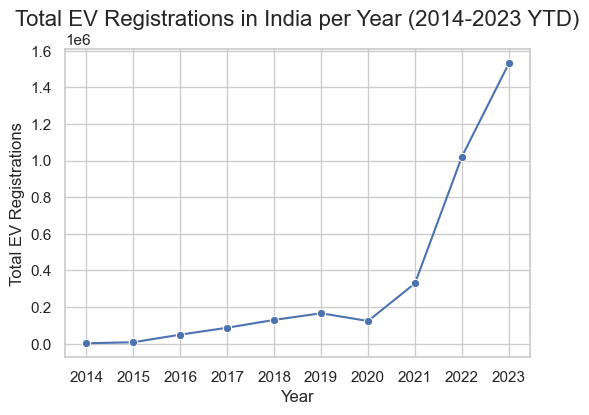

In [93]:
# Plotting the total EV registrations over the years

plt.figure(figsize=(6,4))
sns.lineplot(data=yearly_sales_filtered, x='Year', y='EV_Total', marker='o')
plt.title('Total EV Registrations in India per Year (2014-2023 YTD)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total EV Registrations', fontsize=12)
plt.xticks(yearly_sales_filtered['Year'])
plt.grid(True)
plt.show()

In [57]:
# Group by 'Year' and sum the sales for each EV category

yearly_sales_category = df_ev_cat_clean.groupby('Year')[ev_total_cols].sum().reset_index()
yearly_sales_category_filtered = yearly_sales_category[(yearly_sales_category['Year'] >= 2014) & (yearly_sales_category['Year'] <= 2023)]

print("\nYearly EV Registrations by Category (2014 onwards):")
print(yearly_sales_category_filtered)


Yearly EV Registrations by Category (2014 onwards):
    Year  EV_2W_Total  EV_3W_Total  EV_4W_Total  EV_Bus_Total  EV_Goods_Total
13  2014         1676           12          591             1              88
14  2015         1440         5415          842             3              59
15  2016         1444        46905          805             3             105
16  2017         1526        83350         1234            13             907
17  2018        17082       110179         1738            43             762
18  2019        30405       133496         1725           501              59
19  2020        29125        90386         4213            88              13
20  2021       156331       158258        13033          1175             988
21  2022       631406       350546        38253          1987             328
22  2023       860455       583712        82595          2686            2610


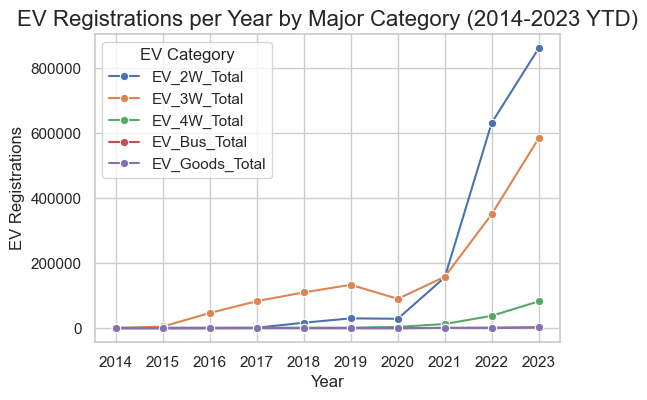

In [61]:
# Plotting EV registration trends by category

plt.figure(figsize=(6, 4))
# Melting data to reshape it for line plot
sns.lineplot(data=yearly_sales_category_filtered.melt(id_vars='Year', var_name='Category', value_name='Sales'),
             x='Year', y='Sales', hue='Category', marker='o')

plt.title('EV Registrations per Year by Major Category (2014-2023 YTD)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('EV Registrations', fontsize=12)
plt.xticks(yearly_sales_category_filtered['Year'])
plt.legend(title='EV Category')
plt.grid(True)
plt.show()

In [65]:
yearly_sales_filtered = yearly_sales[(yearly_sales['Year'] >= 2014) & (yearly_sales['Year'] <= 2023)]
max_sales_year = yearly_sales_filtered.loc[yearly_sales_filtered['EV_Total'].idxmax()]

print(f"\nAfter 2014, the year with highest EV registrations was: {int(max_sales_year['Year'])} ({int(max_sales_year['EV_Total'])} units)")



After 2014, the year with highest EV registrations was: 2023 (1532058 units)


In [73]:
# Sort the states by number of charging stations in descending order
top_charging_states = df_charging_state_counts.sort_values(by='Count', ascending=False)
top_n = 15
top_charging_states_plot = top_charging_states.head(top_n)

print(f"\nTop {top_n} States/UTs by Listed Charging Stations:")
print(top_charging_states.head(top_n))


Top 15 States/UTs by Listed Charging Stations:
             State  Count
0      MAHARASHTRA    259
1       TAMIL NADU    175
2        KARNATAKA    134
3            DELHI    126
4           KERALA     91
5    UTTAR PRADESH     87
6          GUJARAT     77
7        TELANGANA     75
8        RAJASTHAN     68
9          HARYANA     60
10  ANDHRA PRADESH     56
11       DELHI NCR     53
12     WEST BENGAL     53
13          ODISHA     38
14          PUNJAB     24


C:\Users\amitk\AppData\Local\Temp\ipykernel_2716\3402261516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_charging_states_plot, x='Count', y='State', palette='viridis')


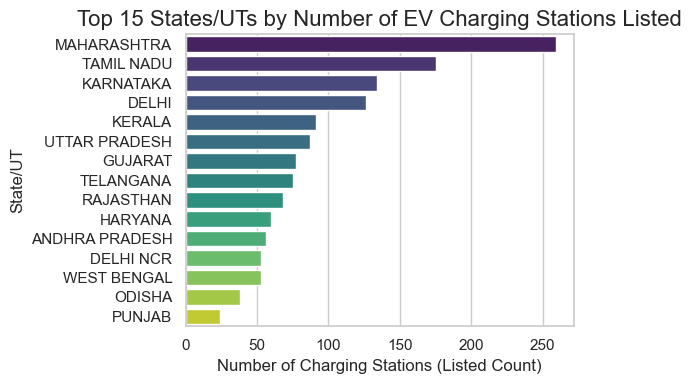

In [81]:
# Plot the top states/UTs by charging station count
plt.figure(figsize=(6, 4)) # Thoda bada kar diya size better visibility ke liye
sns.barplot(data=top_charging_states_plot, x='Count', y='State', palette='viridis')

plt.title(f'Top {top_n} States/UTs by Number of EV Charging Stations Listed', fontsize=16)
plt.xlabel('Number of Charging Stations (Listed Count)', fontsize=12) # Updated label
plt.ylabel('State/UT', fontsize=12)
plt.tight_layout()
plt.show()

In [85]:
# Identify potential Tier 1 states based on quantiles (75th percentile)
threshold_tier1 = top_charging_states['Count'].quantile(0.75)
tier1_states = top_charging_states[top_charging_states['Count'] >= threshold_tier1]['State'].tolist()
print(f"\nPotential Tier 1 Geographic Segments (High Charging Infra - Top {len(tier1_states)} states):")

print(tier1_states)


Potential Tier 1 Geographic Segments (High Charging Infra - Top 14 states):
['MAHARASHTRA', 'TAMIL NADU', 'KARNATAKA', 'DELHI', 'KERALA', 'UTTAR PRADESH', 'GUJARAT', 'TELANGANA', 'RAJASTHAN', 'HARYANA', 'ANDHRA PRADESH', 'DELHI NCR', 'WEST BENGAL', 'ODISHA']


In [87]:
# This code calculates the yearly EV penetration percentage by merging EV sales data with total vehicle registration data

# Merge EV sales and total vehicle registration data on 'Year'
yearly_summary = pd.merge(
    yearly_sales_filtered,
    df_fuel_reg_clean[['Year', 'Total_Vehicles_Year', 'ELECTRIC(BOV)']],
    on='Year',
    how='left'
)

# Calculate EV penetration percentage for each year
yearly_summary['Yearly_Penetration_Percent'] = (yearly_summary['EV_Total'] / yearly_summary['Total_Vehicles_Year']) * 100

# Show year-wise EV sales, total vehicle sales, and calculated penetration percentage
print("\nYearly Summary (EV Sales, Total Sales, Yearly Penetration %):")
print(yearly_summary[['Year', 'EV_Total', 'Total_Vehicles_Year', 'Yearly_Penetration_Percent']].dropna())

# Save final data for plotting
yearly_penetration_plot_data = yearly_summary[['Year', 'Yearly_Penetration_Percent']].dropna()



Yearly Summary (EV Sales, Total Sales, Yearly Penetration %):
   Year  EV_Total  Total_Vehicles_Year  Yearly_Penetration_Percent
0  2014      2368             19310511                    0.012263
1  2015      7759             19669623                    0.039447
2  2016     49262             21323970                    0.231017
3  2017     87030             23291896                    0.373649
4  2018    129804             25409107                    0.510856
5  2019    166186             24131120                    0.688679
6  2020    123825             18613105                    0.665257
7  2021    329785             18891566                    1.745673
8  2022   1022520             21556138                    4.743521
9  2023   1532058             13172415                   11.630806


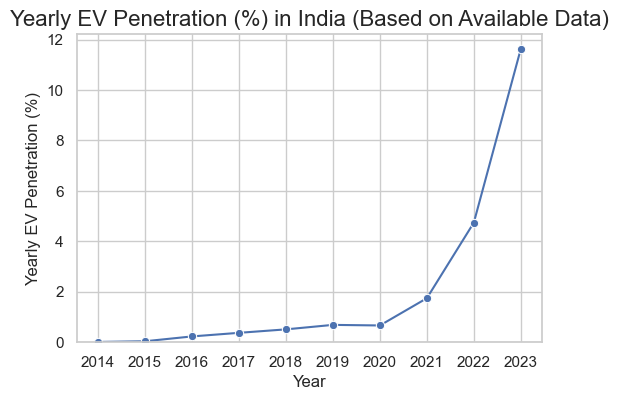

In [91]:
# This code plots the yearly percentage of electric vehicle (EV) penetration using the corrected data

plt.figure(figsize=(6, 4))
sns.lineplot(data=yearly_penetration_plot_data, x='Year', y='Yearly_Penetration_Percent', marker='o')
plt.title('Yearly EV Penetration (%) in India (Based on Available Data)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Yearly EV Penetration (%)', fontsize=12)
plt.xticks(yearly_penetration_plot_data['Year'].astype(int))
plt.ylim(bottom=0)
plt.grid(True)
plt.show()